# CS 373 Project

## 1. Load Data

In [46]:
import pandas as pd
import datetime
import warnings

def gen_clean_data():
    warnings.filterwarnings('ignore')
    df = pd.read_csv("Melbourne_housing_FULL.csv")
    df = df[['Price', 'Distance', 'Date', 'Car', 'BuildingArea', 'YearBuilt']]
    clean_df = df.dropna(how='any', axis=0)
    clean_df['Date'] = [ (datetime.datetime(2018, 10, 1) - datetime.datetime.strptime(x, '%d/%m/%Y')).days for x in clean_df['Date']]
    clean_df.to_csv("clean_data.csv", sep='\t')
    return clean_df

## 2. Filter data, convert date delta to actual number of days

In [69]:
import numpy as np
import pandas as pd
np.set_printoptions(precision=2)

def get_data_points():
    df = pd.read_csv("clean_data.csv", sep='\t')
    df = df.dropna(how='any', axis=0)
    x_points = df[['Distance', 'Date', 'BuildingArea', 'YearBuilt']]
    y_points = df[['Price']]
    return np.array(x_points), np.array(y_points)

x, y = get_data_points()
print(x)
print(y)

[[   2.5  970.    79.  1900. ]
 [   2.5  576.   150.  1900. ]
 [   2.5  849.   142.  2014. ]
 ...
 [   6.3  219.   104.  2018. ]
 [   6.3  219.   120.  2000. ]
 [   6.3  219.   103.  1930. ]]
[[1035000.]
 [1465000.]
 [1600000.]
 ...
 [ 888000.]
 [ 705000.]
 [1020000.]]


## 3. Analyze the data

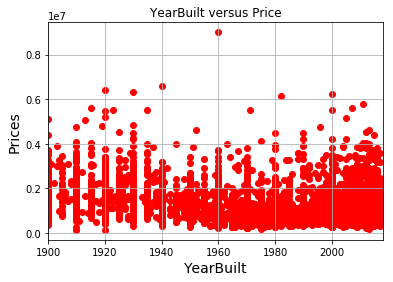

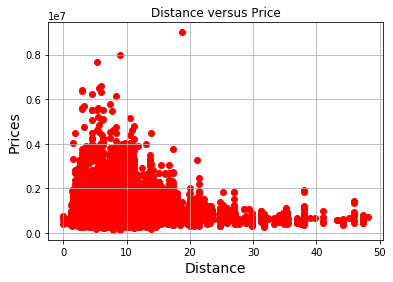

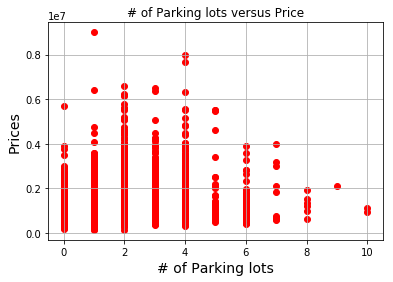

In [70]:
import matplotlib.pyplot as plt
import pandas as pd

def get_data_points():
    df = pd.read_csv("clean_data.csv", sep='\t')
    df = df.dropna(how='any', axis=0)
    x_points = df[['Distance', 'Date', 'Car','BuildingArea', 'YearBuilt']]
    y_points = df[['Price']]
    return np.array(x_points), np.array(y_points)

x, y = get_data_points()
df = pd.read_csv("clean_data.csv", sep='\t')

# Plot room versus price
plt.scatter(df['YearBuilt'], df['Price'], color='red')
plt.title('YearBuilt versus Price')
plt.xlim((1900, 2018))
plt.xlabel('YearBuilt', fontsize=14)
plt.ylabel('Prices', fontsize=14)
plt.grid(True)
plt.show()

# Plot distance versus price
plt.scatter(df['Distance'], df['Price'], color='red')
plt.title('Distance versus Price')
plt.xlabel('Distance', fontsize=14)
plt.ylabel('Prices', fontsize=14)
plt.grid(True)
plt.show()

# Plot Car(Parking lots) versus price
plt.scatter(df['Car'], df['Price'], color='red')
plt.title('# of Parking lots versus Price')
plt.xlabel('# of Parking lots', fontsize=14)
plt.ylabel('Prices', fontsize=14)
plt.grid(True)
plt.show()


## 4. Training with ridge linear regression

In [78]:
from sklearn.linear_model import Ridge

x, y = get_data_points()
x_train = x[:5000]
y_train = y[:5000]

clf = Ridge(alpha=0)
mod = clf.fit(x_train, y_train) 

print(mod.score(x, y))

0.44195439637180634


## 4.1 Training with lasso regression

In [71]:
from sklearn.linear_model import Lasso

x, y = get_data_points()
x_train = x
y_train = y

clf = Lasso(alpha=1)
mod = clf.fit(x_train, y_train) 

print(mod.score(x, y))

0.45104714805051027


## 5 Analyze error

In [72]:
y_pred = mod.predict(x)
print(np.sqrt(np.mean((y_pred - y) ** 2)))
print(y_pred)
print(y)
print(min(y))

818580.7416914196
[1134923.93 1508825.53  997248.48 ...  770392.14 1029610.95 1141240.69]
[[1035000.]
 [1465000.]
 [1600000.]
 ...
 [ 888000.]
 [ 705000.]
 [1020000.]]
[131000.]
